(sec_data)=

# Data

```{admonition} FIXME
:class: warning
- Describe data sets used in course
- Should make_test_data.py also generate experimental data through downloads?
```

```{note}
Datasets are presumably of three types:

1. simulated data
2. experimental data
3. precomputed results

Datasets 1 and 2 will be used for analyses. Datasets of type 3 are
results that take a long time to compute (e.g. on a HPC) and will be
needed to enable compilation of jupyter book examples
```

Data sets reside in the `data` subdirectory. Simulated data sets have
been generated with the script `data/make_test_data.py`.

(sec_data_simulated)=

## Simulated data


(sec_data_simulated_ooa)=

### Out of Africa (ooa)

```{admonition} FIXME
:class: warning
Simulate and add out of Africa dataset without outgroups. Can be simulated with stdpopsim.
```



The out of Africa dataset is based on the
{cite}`gutenkunst_InferringJointDemographic_2009` demographic model
(see also [msprime out of Africa
example](https://tskit.dev/msprime/docs/stable/demography.html#population-tree)
and [the stdpopsim out of Africa model
specification](https://popsim-consortium.github.io/stdpopsim-docs/stable/catalog.html#sec_catalog_homsap_models_outofafrica_3g09))


### Out of Africa with outgroups (ooa-outgroups)

The out of Africa with outgroups is an extension of the 
In addition to simulating human data, the model has been expanded to
include three outgroups chimpanzee, gorilla and orangutan (Figure
{numref}`fig-ooa-demesdraw`).

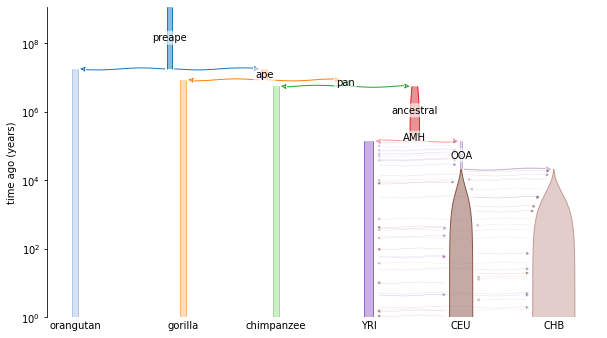

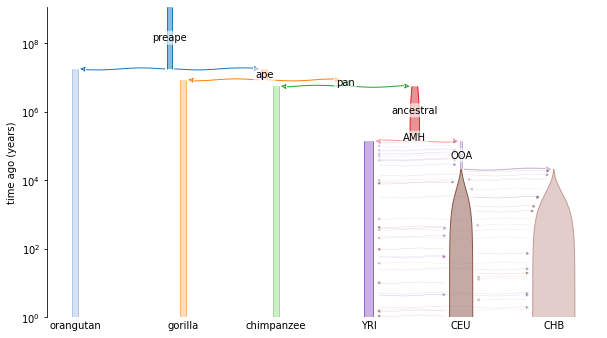

In [1]:
from myst_nb import glue
import demes
import demesdraw
ooa = demes.load("data/ooa-outgroups/ooa_with_outgroups.demes.yaml")
ax = demesdraw.tubes(ooa, num_lines_per_migration=6, log_time=True, seed=32)
glue("fig-ooa-demesdraw", ax.figure, display=False)

```{glue:figure} fig-ooa-demesdraw
:name: fig-ooa-demesdraw

[demesdraw](https://grahamgower.github.io/demesdraw/latest/quickstart.html) illustration of out of Africa model.
```